In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data


city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

pyber_df = pd.merge(ride_df, city_df, on="city")
pyber_df.head()

# Display the data table for preview


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [4]:
pyber_df = pyber_df.set_index("city")
pyber_df.head()

,date,fare,ride_id,driver_count,type
city,,,,,
Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

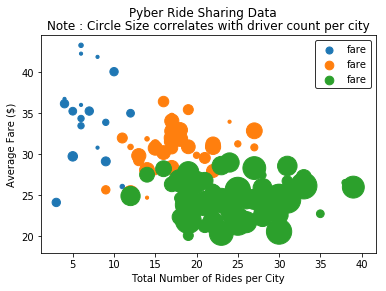

In [22]:
# Obtain the x and y coordinates for each of the three city types
urban_cities = pyber_df[pyber_df["type"] == "Urban"]
suburban_cities = pyber_df[pyber_df["type"] == "Suburban"]
rural_cities = pyber_df[pyber_df["type"] == "Rural"]

urban_rides = urban_cities.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]

suburban_rides = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]

rural_rides = rural_cities.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]

# Build the scatter plots for each city types

plt.scatter(rural_rides, rural_avg_fare, s = rural_driver_count *10)
plt.scatter(suburban_rides, suburban_avg_fare, s = suburban_driver_count *10)
plt.scatter(urban_rides, urban_avg_fare, s = urban_driver_count *10)

# Incorporate the other graph properties

plt.suptitle('Pyber Ride Sharing Data')
plt.xlabel('Total Number of Rides per City')
plt.ylabel('Average Fare ($)')

# Create a legend
lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

# Incorporate a text label regarding circle size

plt.title('Note : Circle Size correlates with driver count per city')

# Save Figure
plt.show()


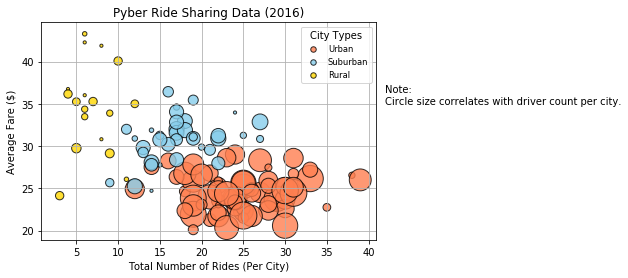

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

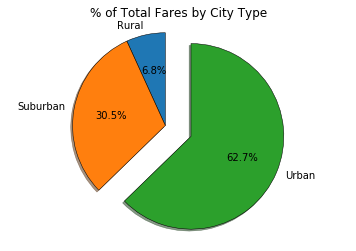

In [25]:
# Calculate Type Percents

by_type = pyber_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']
fare_sum = by_type.sum()['fare']
labels = fare_sum.index
explode = [0 , 0, .3]
plt.pie(fare_sum, startangle = 90, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})


# Build Pie Chart
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()

# Save Figure


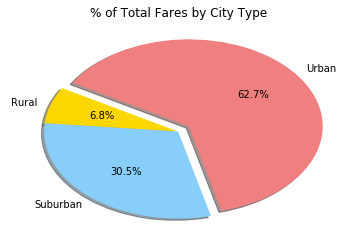

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

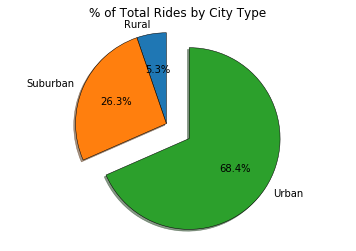

In [27]:
# Calculate Ride Percents

ride_sum = by_type.count()['ride_id']


# Build Pie Chart

labels = ride_sum.index
plt.pie(ride_sum, startangle = 90, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()

# Save Figure


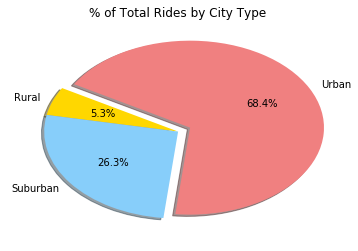

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

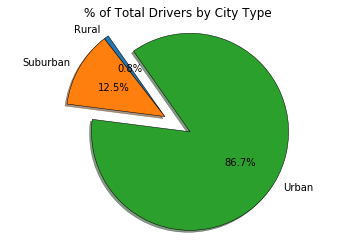

In [28]:
# Calculate Driver Percents

driver_sum = by_type.sum()['driver_count']
labels = driver_sum.index


# Build Pie Charts

plt.pie(driver_sum, startangle = 125, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()

# Save Figure


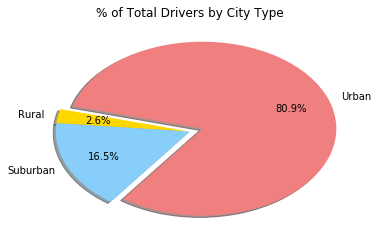

In [6]:
# Show Figure
plt.show()